<a href="https://colab.research.google.com/github/lilswapnil/book-recommender/blob/main/notebook/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Exploration

First, create a `requirements.txt` file and add the packages you need. For example, if you need `pandas` and `numpy`:

In [15]:
%%writefile requirements.txt
pandas
numpy
kagglehub
matplotlib
seaborn

Overwriting requirements.txt


Then, install the packages from the `requirements.txt` file:

In [16]:
%pip install -r requirements.txt

In [17]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Download latest version
path = kagglehub.dataset_download("mdhamani/goodreads-books-100k")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'goodreads-books-100k' dataset.
Path to dataset files: /kaggle/input/goodreads-books-100k


In [20]:
books = pd.read_csv(f"{path}/GoodReads_100k_books.csv")
books.shape

(100000, 13)

In [21]:
books.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


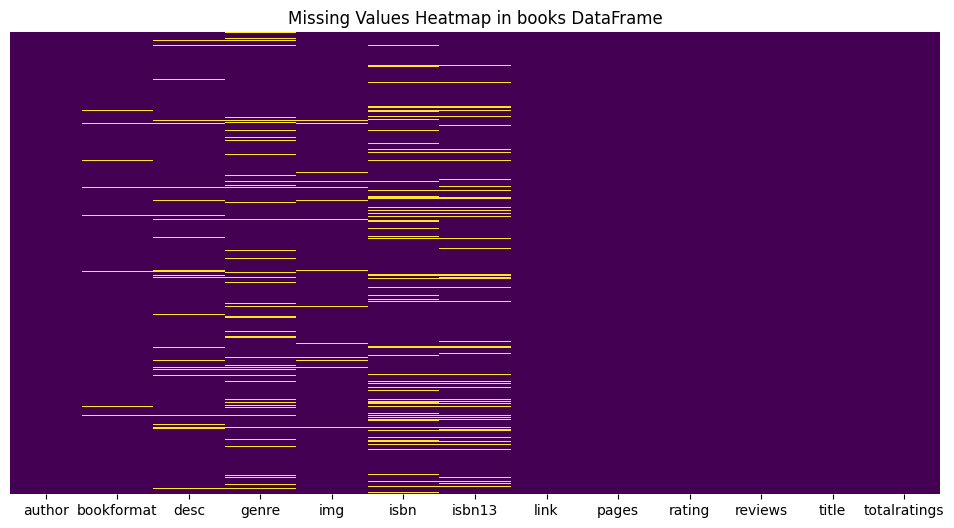

In [22]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(books.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap in books DataFrame')
plt.show()

In [26]:
missing_title_count = books['title'].isnull().sum()
missing_description_count = books['desc'].isnull().sum()
missing_isbn_count = books['isbn'].isnull().sum()
missing_isbn13_count = books['isbn13'].isnull().sum()
missing_genre_count = books['genre'].isnull().sum()
missing_author_count = books['author'].isnull().sum()
missing_pages_count = books['pages'].isnull().sum()

print(f"Number of books with missing titles: {missing_title_count}")
print(f"Number of books with missing authors: {missing_author_count}")
print(f"Number of books with missing ISBNs: {missing_isbn_count}")
print(f"Number of books with missing ISBN-13s: {missing_isbn13_count}")
print(f"Number of books with missing genres: {missing_genre_count}")
print(f"Number of books with missing descriptions: {missing_description_count}")
print(f"Number of books with missing page counts: {missing_pages_count}")

Number of books with missing titles: 1
Number of books with missing authors: 0
Number of books with missing ISBNs: 14482
Number of books with missing ISBN-13s: 11435
Number of books with missing genres: 10467
Number of books with missing descriptions: 6772
Number of books with missing page counts: 0


In [32]:
books_with_missing_info = books[books['isbn'].isnull() & books['isbn13'].isnull() & books['desc'].isnull() & books['genre'].isnull()]
books = books.drop(books_with_missing_info.index)

In [34]:
books.shape

(99394, 13)

In [35]:
books.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


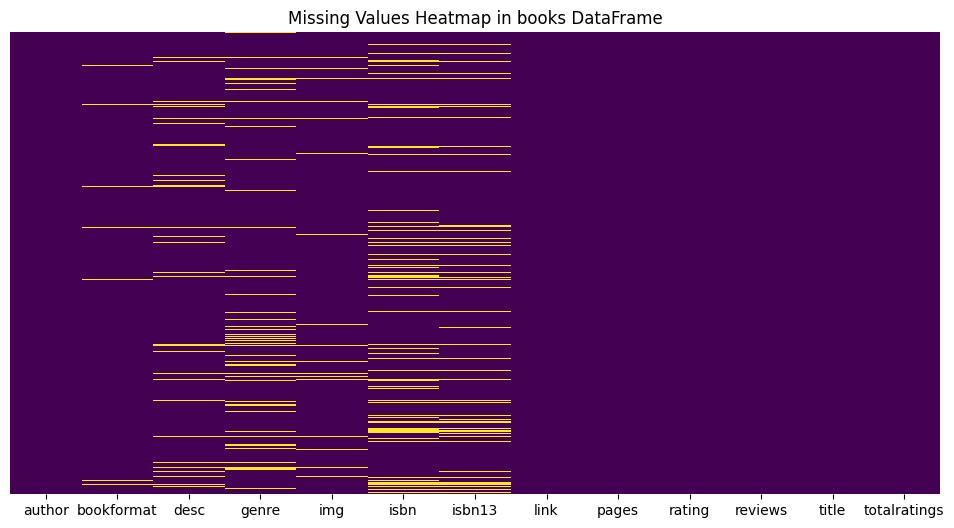

In [36]:
plt.figure(figsize=(12, 6))
sns.heatmap(books.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap in books DataFrame')
plt.show()

In [38]:
books['bookformat'] = books['bookformat'].fillna('Unknown')
books['img'] = books['img'].fillna('No Image')

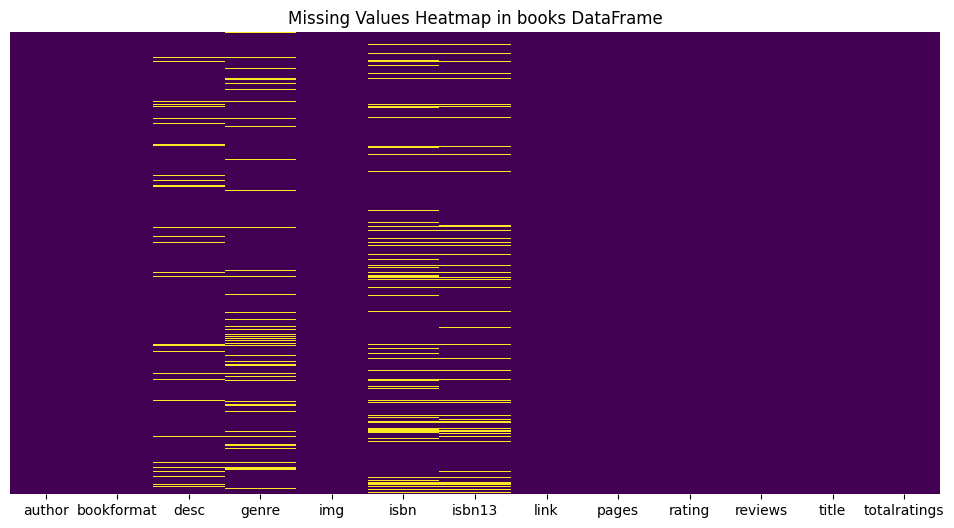

In [39]:
plt.figure(figsize=(12, 6))
sns.heatmap(books.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap in books DataFrame')
plt.show()

In [47]:
books_no_genre_desc = books[books['genre'].isnull() & books['desc'].isnull()]
books_no_genre_desc.head()
books = books.drop(books_no_genre_desc.index)

In [48]:
books_no_isbn13 = books[books['isbn13'].isnull()]
books_no_isbn13.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
4,Jean Leveille,Unknown,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1
378,Stephen Moss,Unknown,Case Management Assistance to an adult or the ...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,756702577,NaN,https://goodreads.com/book/show/10042599-contr...,0,0.00,0,Contracting for Managed Substance Abuse and Me...,0
507,"Lin Carter,Vincent Di Fate",Mass Market Paperback,Librarian note: Dell 4182 95Â¢ on the front co...,"Fantasy,Science Fiction,Science Fiction,Sword ...",https://i.gr-assets.com/images/S/compressed.ph...,440041821,NaN,https://goodreads.com/book/show/1005186.Jandar...,224,3.57,18,Jandar of Callisto,221
544,Chad Hensley,Hardcover,ESOTERRA was an underground magazine focusing ...,"Cultural,Counter Culture,Nonfiction,Art",https://i.gr-assets.com/images/S/compressed.ph...,1840681748,NaN,https://goodreads.com/book/show/10054832-esote...,320,3.86,1,Esoterra - The Journal of Extreme Culture,28
641,Danny Vendramini,Paperback,Put aside everything you thought you knew abou...,Nonfiction,https://i.gr-assets.com/images/S/compressed.ph...,9780908244,NaN,https://goodreads.com/book/show/10062419-them-us,313,3.95,11,Them+Us,38


In [49]:
#drop books with no isbn and no isbn3
books_with_no_isbn_and_isbn13 = books[books['isbn'].isnull() & books['isbn13'].isnull()]
books = books.drop(books_with_no_isbn_and_isbn13.index)
books.shape

(87883, 13)

In [51]:
books_with_no_description = books[books['desc'].isnull()]
books = books.drop(books_with_no_description.index)
books.shape

(84872, 13)

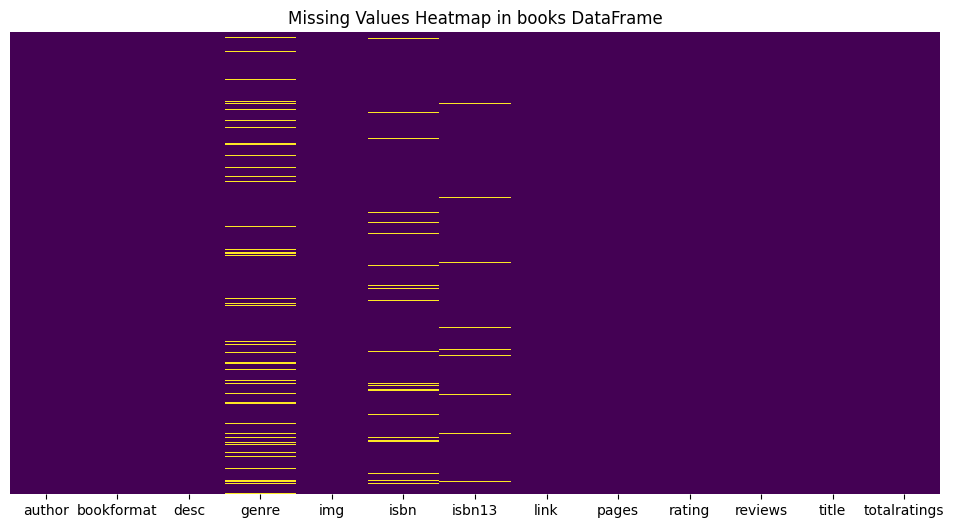

In [52]:
plt.figure(figsize=(12, 6))
sns.heatmap(books.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap in books DataFrame')
plt.show()

In [56]:
books_no_genre_desc = books[books['genre'].isnull() & books['desc'].isnull()]
books = books.drop(books_no_genre_desc.index)
books.shape

(84872, 13)

In [57]:
display(books_no_genre_desc.head())

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings


In [60]:
books_with_no_isbn = books[books['isbn'].isnull()]
books = books.drop(books_with_no_isbn.index)
books.shape

(80796, 13)

In [65]:
books_with_no_isb13 = books[books['isbn13'].isnull()]
books = books.drop(books_with_no_isb13.index)
books.shape

(79694, 13)

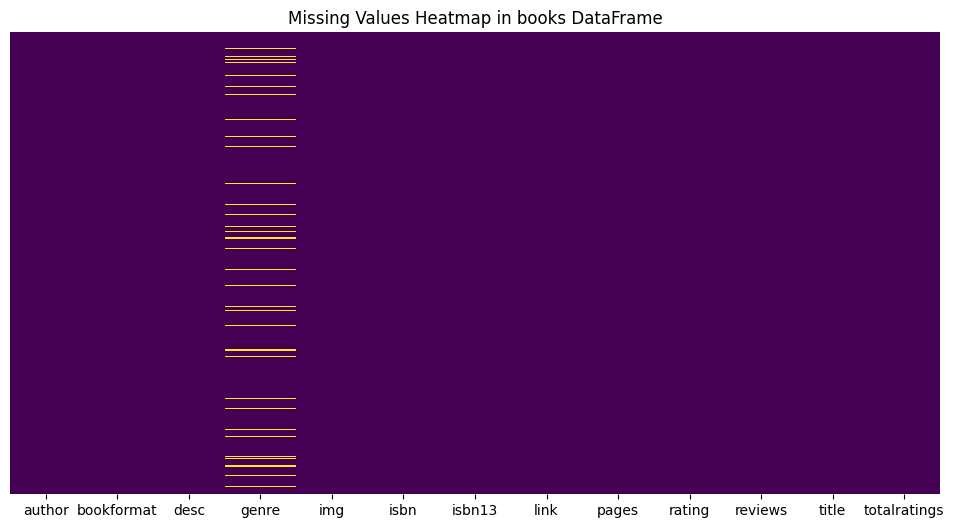

In [66]:
plt.figure(figsize=(12, 6))
sns.heatmap(books.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap in books DataFrame')
plt.show()

In [69]:
books['tag'] = books.apply(lambda row: f"{row['isbn']} {row['desc']}", axis=1)

In [70]:
books['tag'].head()

,tag
0,002914180X Reveals that several hundred thousa...
1,1906863482 Fashion Sourcebook - 1920s is the f...
2,948984147 The seminal history and analysis of ...
3,"814327079 ""All-American Anarchist"" chronicles ..."
5,875848419 Why is common sense so uncommon when...


In [71]:
books

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,tag
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33,002914180X Reveals that several hundred thousa...
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41,1906863482 Fashion Sourcebook - 1920s is the f...
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26,948984147 The seminal history and analysis of ...
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6,"814327079 ""All-American Anarchist"" chronicles ..."
5,Jeffrey Pfeffer,Hardcover,Why is common sense so uncommon when it comes ...,"Business,Leadership,Romance,Historical Romance...",https://i.gr-assets.com/images/S/compressed.ph...,875848419,9.78E+12,https://goodreads.com/book/show/1001090.The_Hu...,368,3.73,7,The Human Equation: Building Profits by Puttin...,119,875848419 Why is common sense so uncommon when...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Simon Monk,ebook,Design custom printed circuit boards with EAGL...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,71819266,9.78007E+12,https://goodreads.com/book/show/17320181-make-...,304,4.07,7,Make Your Own PCBs with Eagle: From Schematic ...,56,71819266 Design custom printed circuit boards ...
99996,"Tracie L. Miller-Nobles,Brenda L. Mattison,Ell...",Hardcover,"Redefining tradition in learning accounting. ,...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,133251241,9.78013E+12,https://goodreads.com/book/show/17320260-horng...,1645,4.05,1,Horngren's Financial & Managerial Accounting,38,133251241 Redefining tradition in learning acc...
99997,C. John Miller,Paperback,In these warm reflections on his own growth as...,"Christianity,Evangelism,Christian,Religion,The...",https://i.gr-assets.com/images/S/compressed.ph...,875523919,9.78088E+12,https://goodreads.com/book/show/173203.A_Faith...,160,4.27,20,A Faith Worth Sharing: A Lifetime of Conversat...,122,875523919 In these warm reflections on his own...
99998,Albert Marrin,Hardcover,"John Brown is a man of many legacies, from her...","Nonfiction,History,Biography,Military History,...",https://i.gr-assets.com/images/S/compressed.ph...,307981533,9.78031E+12,https://goodreads.com/book/show/17320669-a-vol...,256,3.63,51,A Volcano Beneath the Snow: John Brown's War A...,156,307981533 John Brown is a man of many legacies...


In [74]:
books['words in desc'] = books['desc'].str.split().str.len()
books.sort_values(by='words in desc', ascending=True).head(10)

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,tag,words in desc
2739,Linda McCartney,Paperback,Cookery,"Food and Drink,Cookbooks,Food and Drink,Food,F...",https://i.gr-assets.com/images/S/compressed.ph...,1559701609,9.78E+12,https://goodreads.com/book/show/1019108.Linda_...,0,3.99,8,Linda McCartney's Home Cooking,107,1559701609 Cookery,1
23152,"Miu Ootsuki,å¤§æ§»ãƒŸã‚¥",Paperback,"ã€ãŠå‰ã‚“ä¸­ã€å…¥ã‚Œã¦ãã‚Œã‚ˆã€‘,å½¼å¥³...","Sequential Art,Manga,Manga,Yaoi,Yaoi,Boys Love...",https://i.gr-assets.com/images/S/compressed.ph...,4862524656,9.78E+12,https://goodreads.com/book/show/11542114-ai-da...,161,3.47,8,æ„›ã ã®æ‹ã ã® [Ai dano Koi dano],122,4862524656 ã€ãŠå‰ã‚“ä¸­ã€å…¥ã‚Œã¦ãã‚Œã‚...,1
31444,Troy Taylor,Paperback,#NAME?,"Pseudoscience,Cryptozoology",https://i.gr-assets.com/images/S/compressed.ph...,811736407,9.78E+12,https://goodreads.com/book/show/12189065-monst...,123,3.62,8,Monsters of Illinois: Mysterious Creatures in ...,29,811736407 #NAME?,1
31979,Dorothy Whipple,Unknown,Memoir.,"European Literature,British Literature,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,859971538,9.78E+12,https://goodreads.com/book/show/12232417-the-o...,253,4.15,3,The Other Day,13,859971538 Memoir.,1
28416,Scott R. Swain,Paperback,>,"Religion,Theology,Religion,Scripture",https://i.gr-assets.com/images/S/compressed.ph...,567265404,9.78E+12,https://goodreads.com/book/show/11973086-trini...,168,4.35,17,"Trinity, Revelation, and Reading: A Theologica...",88,567265404 >,1
13740,E. Burke Rochford,Paperback,.,NaN,https://i.gr-assets.com/images/S/compressed.ph...,813511143,9.78E+12,https://goodreads.com/book/show/1091434.Hare_K...,0,3.92,2,Hare Krishna In America,12,813511143 .,1
33546,"Yumi Hotta,Takeshi Obata",Paperback,å¤§åˆ‡ãªæ±ºæ„ã‚’èƒ¸ã«ãƒ—ãƒ­æ£‹å£«ã¨ã—ã¦æ...,"Sequential Art,Manga",https://i.gr-assets.com/images/S/compressed.ph...,4087822222,9.78E+12,https://goodreads.com/book/show/12347939-17,240,4.50,0,ãƒ’ã‚«ãƒ«ã®ç¢ å®Œå…¨ç‰ˆ 17,12,4087822222 å¤§åˆ‡ãªæ±ºæ„ã‚’èƒ¸ã«ãƒ—ãƒ­æ£‹å£...,1
52733,"Yukito Ayatsuji,ç¶¾è¾» è¡Œäºº,Hiro Kiyohara,æ¸...",Paperback,ä¸­é–“è©¦é¨“ã‚’é–“è¿‘ã«æŽ§ãˆãŸæ”¾èª²å¾Œã€ä...,"Sequential Art,Manga,Horror,Mystery,Sequential...",https://i.gr-assets.com/images/S/compressed.ph...,4047156280,9.78E+12,https://goodreads.com/book/show/13494495-anoth...,142,4.23,77,Another [ã‚¢ãƒŠã‚¶ãƒ¼] 2nd period,1657,4047156280 ä¸­é–“è©¦é¨“ã‚’é–“è¿‘ã«æŽ§ãˆãŸæ”...,1
90361,Haru Akiyama,Paperback,èª°ã‹ã‹ã‚‰æ„›ã•ã‚ŒãŸã„â”€â”€ãã†é¡˜ã£ã...,"Sequential Art,Manga,Manga,Yuri,Sequential Art...",https://i.gr-assets.com/images/S/compressed.ph...,4063145840,9.78406E+12,https://goodreads.com/book/show/16283534-3,210,3.98,0,ã‚ªã‚¯ã‚¿ãƒ¼ãƒ´ 3,53,4063145840 èª°ã‹ã‹ã‚‰æ„›ã•ã‚ŒãŸã„â”€â”€ã...,1
27901,Linda S. Godfrey,Paperback,#NAME?,"Pseudoscience,Cryptozoology,Fantasy,Paranormal...",https://i.gr-assets.com/images/S/compressed.ph...,811707482,9.78E+12,https://goodreads.com/book/show/11932874-monst...,144,3.89,7,Monsters of Wisconsin: Mysterious Creatures i...,73,811707482 #NAME?,1


In [80]:
books_with_less_words_in_desc = books[books['words in desc'] < 25]
books = books.drop(books_with_less_words_in_desc.index)
books.shape

(75750, 15)

In [86]:
cleaned_books = books.drop(['bookformat', 'img', 'isbn13', 'link', 'pages', 'totalratings','words in desc'], axis=1)
cleaned_books.head()

,author,desc,genre,isbn,rating,reviews,title,tag
0,Laurence M. Hauptman,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",002914180X,3.52,5,Between Two Fires: American Indians in the Civ...,002914180X Reveals that several hundred thousa...
1,"Charlotte Fiell,Emmanuelle Dirix",Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",1906863482,4.51,6,Fashion Sourcebook 1920s,1906863482 Fashion Sourcebook - 1920s is the f...
2,Andy Anderson,The seminal history and analysis of the Hungar...,"Politics,History",948984147,4.15,2,Hungary 56,948984147 The seminal history and analysis of ...
3,Carlotta R. Anderson,"""All-American Anarchist"" chronicles the life a...","Labor,History",814327079,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,"814327079 ""All-American Anarchist"" chronicles ..."
5,Jeffrey Pfeffer,Why is common sense so uncommon when it comes ...,"Business,Leadership,Romance,Historical Romance...",875848419,3.73,7,The Human Equation: Building Profits by Puttin...,875848419 Why is common sense so uncommon when...


In [87]:
cleaned_books.shape

(75750, 8)

In [88]:
books.to_csv('books.csv', index=False)

In [81]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=books_with_less_words_in_desc)

https://docs.google.com/spreadsheets/d/1mzUPex8UDr7TwukmDgyF80s0MQoSe8ATw1giBcOf0TE/edit#gid=0
